/root/anaconda3/envs/control/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


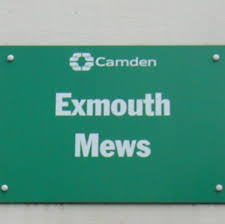

In [1]:
#pretrained_checkpoint 안에 hi_sam_h.pth 넣으시오  

from tools import draw_centers_with_text
from tools import mask_size 
from tools import find_white_centers 
from PIL import Image 
import numpy as np 
from hi_sam_test.hisam import run_text_detection 

PATH="scene2.jpg"
sample_text="bear"
sample=Image.open(PATH)
sample


In [2]:
mask=run_text_detection(PATH)
masks=mask.squeeze(1)
new_mask=np.zeros_like(masks[0,:,:])

for mask in masks:
    new_mask+=mask

Freeze image encoder.
<All keys matched successfully>
Loaded model


/root/anaconda3/envs/control/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


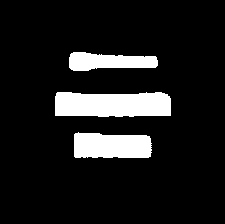

In [3]:
new_mask=Image.fromarray(new_mask)
new_mask2=new_mask
new_mask2

In [4]:
font_size_list=mask_size(new_mask2)
centers=find_white_centers(new_mask2)
font_size_list=[factor[1] for factor in font_size_list]

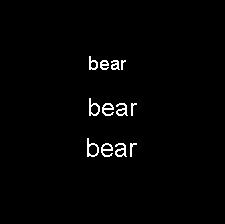

In [5]:
text_contents=[sample_text]*len(font_size_list)
scene_text_image=draw_centers_with_text(new_mask2,centers,text_contents,font_size_list)
scene_text_image